<a href="https://colab.research.google.com/github/KhaSab5292/DS-Unit-1-Build/blob/master/Unit_1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfdogs = pd.read_csv('DOHMH_Dog_Bite_Data.csv')
print(dfdogs.shape)
dfdogs.head()

(10280, 9)


,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207


In [3]:
dfdogs.isnull().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed         1588
Age           4746
Gender           0
SpayNeuter       0
Borough          0
ZipCode       2667
dtype: int64

In [4]:
dfdogs.dtypes

UniqueID       int64
DateOfBite    object
Species       object
Breed         object
Age           object
Gender        object
SpayNeuter      bool
Borough       object
ZipCode       object
dtype: object

In [5]:
dfdogs.describe()

,UniqueID
count,10280.000000
mean,5140.500000
std,2967.724718
min,1.000000
25%,2570.750000
50%,5140.500000
75%,7710.250000
max,10280.000000


In [6]:
dfdogs.describe(exclude = 'number')

,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
count,10280,10280,8692,5534,10280,10280,10280,7613
unique,1096,1,1032,153,3,2,6,349
top,September 16 2017,DOG,Pit Bull,2,U,False,Queens,10029
freq,25,10280,1921,835,4448,7289,2520,166


In [7]:
dfdogs['Gender'].value_counts()

U    4448
M    4203
F    1629
Name: Gender, dtype: int64

In [8]:
dfdogs['Borough'].value_counts()

Queens           2520
Manhattan        2354
Brooklyn         2281
Bronx            1757
Staten Island     931
Other             437
Name: Borough, dtype: int64

In [9]:
dfdogs = dfdogs.drop(columns = ['Species', 'Age', 'Gender', 'SpayNeuter', 'ZipCode'])
print(dfdogs.shape)
dfdogs.head()

(10280, 4)


,UniqueID,DateOfBite,Breed,Borough
0,1,January 02 2015,"Poodle, Standard",Brooklyn
1,2,January 02 2015,HUSKY,Brooklyn
2,3,January 02 2015,NaN,Brooklyn
3,4,January 01 2015,American Pit Bull Terrier/Pit Bull,Brooklyn
4,5,January 03 2015,American Pit Bull Terrier/Pit Bull,Brooklyn


In [10]:
dfdogs = dfdogs.rename(columns = {'Breed': 'DogBreed'})
dfdogs.isnull().sum()

UniqueID         0
DateOfBite       0
DogBreed      1588
Borough          0
dtype: int64

In [11]:
dfdogs = dfdogs.dropna(subset = ['DogBreed'])
dfdogs.isnull().sum()

UniqueID      0
DateOfBite    0
DogBreed      0
Borough       0
dtype: int64

In [12]:
print(dfdogs.shape)
dfdogs.head()

(8692, 4)


,UniqueID,DateOfBite,DogBreed,Borough
0,1,January 02 2015,"Poodle, Standard",Brooklyn
1,2,January 02 2015,HUSKY,Brooklyn
3,4,January 01 2015,American Pit Bull Terrier/Pit Bull,Brooklyn
4,5,January 03 2015,American Pit Bull Terrier/Pit Bull,Brooklyn
5,6,January 05 2015,American Pit Bull Terrier/Pit Bull,Brooklyn


In [13]:
dfdogs.describe(exclude = 'number')

,DateOfBite,DogBreed,Borough
count,8692,8692,8692
unique,1096,1032,6
top,June 06 2015,Pit Bull,Queens
freq,22,1921,2189


In [14]:
dfdogs['DogBreed'].value_counts().sort_values(ascending = False)

Pit Bull                                   1921
Shih Tzu                                    364
American Pit Bull Terrier/Pit Bull          349
Chihuahua                                   344
American Pit Bull Mix / Pit Bull Mix        340
German Shepherd                             274
Mixed/Other                                 262
Yorkshire Terrier                           228
Maltese                                     187
UNKNOWN                                     169
Rottweiler                                  159
Labrador Retriever                          157
Bull dog                                    121
Siberian Husky                              117
Jack Russ                                   113
Poodle, Standard                            111
Cocker Spaniel                               96
Labrador Retriever Crossbreed                83
American Staffordshire Terrier               81
TERRIER                                      79
Beagle                                  

In [0]:
def fix_breed_label(breed):
    if breed in ['American Pit Bull Terrier/Pit Bull', 'American Pit Bull Mix / Pit Bull Mix', 'PIT BULL MIX']:
      return 'Pit Bull'
    elif breed in ['Siberian Husky', 'HUSKY -X', 'ALASKAN HUSKY MIX', 'ALASKA HUSKY', 'HUSKY']:
      return 'Husky '
    elif breed in ['Labrador Retriever Crossbreed', 'LABRADOR MIX']:
      return 'Labrador Retriever'
    elif breed in ['Bull dog', 'Bull Dog, English', 'Bull Dog, French', 'FRENCH BULL DOG', 'ENGLISH BULL DOG']:
      return 'Bull Dog'
    elif breed in ['Poodle, Standard', 'MINI POODLE X', 'SCHNAUZER POODLE MIX', 'Poodle, Miniature', 'POODLE MIX', 'Poodle, Toy']:
      return 'Poodle'
    elif breed in ['Chihuahua Crossbreed', 'CHIHUAHUA']:
      return 'Chihuahua'
    elif breed in ['Yorkshire Terrier', 'American Staffordshire Terrier', 'BEAVER TERRIERS', 'TERRIER MIX', 'TERRIER', 
                   'BOSTON BORDER TERRIER', 'Boston Terrier', 'BOSTON TERRIER MIX', 'MIXED TERRIER', 'Yorkshire Terrier Crossbreed', 
                   'Staffordshire Bull Terrier', 'Bull Terrier', 'West High White Terrier']:
      return 'Terrier'
    elif breed in ['SHEPHERD', 'Australian Shepherd', 'German Shepherd', 'German Shepherd Crossbreed']:
      return 'Shepherd'
    elif breed in ['SHIH TZU MIX']:
      return 'Shih Tzu'
    elif breed in ['Beagle Crossbreed']:
      return 'Beagle'
    elif breed in ['MIXED', 'UNKNOWN', 'Mixed/Other', 'NOT SURE, RESCUE', 'MIXED BREED']:
      return 'Other' 
    else:
      return breed

In [16]:
dfdogs['DogBreed'] = dfdogs['DogBreed'].apply(fix_breed_label)
dfdogs['DogBreed'].value_counts().sort_values(ascending = False)

Pit Bull                                   2648
Terrier                                     559
Other                                       514
Chihuahua                                   389
Shih Tzu                                    384
Shepherd                                    356
Labrador Retriever                          258
Bull Dog                                    213
Poodle                                      187
Maltese                                     187
Rottweiler                                  159
Husky                                       141
Jack Russ                                   113
Cocker Spaniel                               96
Beagle                                       94
Boxer                                        64
Golden Retriever                             58
Pomeranian                                   55
Shiba Inu                                    51
Bichon Frise                                 43
Chow Chow                               

In [0]:
counts = dfdogs['DogBreed'].value_counts()

dfdogs = dfdogs[~dfdogs['DogBreed'].isin(counts[counts < 20].index)]

In [18]:
print(dfdogs.shape)
dfdogs.head()

(6937, 4)


,UniqueID,DateOfBite,DogBreed,Borough
0,1,January 02 2015,Poodle,Brooklyn
1,2,January 02 2015,Husky,Brooklyn
3,4,January 01 2015,Pit Bull,Brooklyn
4,5,January 03 2015,Pit Bull,Brooklyn
5,6,January 05 2015,Pit Bull,Brooklyn


In [19]:
dfdogs['DogBreed'].value_counts()

Pit Bull                 2648
Terrier                   559
Other                     514
Chihuahua                 389
Shih Tzu                  384
Shepherd                  356
Labrador Retriever        258
Bull Dog                  213
Poodle                    187
Maltese                   187
Rottweiler                159
Husky                     141
Jack Russ                 113
Cocker Spaniel             96
Beagle                     94
Boxer                      64
Golden Retriever           58
Pomeranian                 55
Shiba Inu                  51
Bichon Frise               43
Cane Corso                 42
Chow Chow                  42
Miniature Pinscher         37
Lhasa Apso                 36
Doberman Pinscher          36
Dachshund Smooth Coat      35
Akita                      30
Pekingese                  30
Havanese                   28
MUTT                       26
Mastiff, Bull              26
Name: DogBreed, dtype: int64

In [20]:
dfdogs['DateOfBite']

0         January 02 2015
1         January 02 2015
3         January 01 2015
4         January 03 2015
5         January 05 2015
7         January 05 2015
12        January 05 2015
13        January 01 2015
14        January 07 2015
15        January 05 2015
16        January 09 2015
17        January 10 2015
18        January 10 2015
19        January 13 2015
20        January 12 2015
21        January 16 2015
22        January 12 2015
23        January 17 2015
24        January 21 2015
25        January 22 2015
27        January 27 2015
28        January 25 2015
29        January 25 2015
30        January 25 2015
32        January 29 2015
33        January 31 2015
34        January 31 2015
36        January 23 2015
38       February 04 2015
40       February 01 2015
               ...       
10236    November 03 2017
10238    November 05 2017
10239    November 04 2017
10241     October 30 2017
10243    November 06 2017
10246    November 15 2017
10249    November 19 2017
10250    Nov

In [21]:
dfdogs2015 = dfdogs[dfdogs['DateOfBite'].str.contains("2015")]
dfdogs2016 = dfdogs[dfdogs['DateOfBite'].str.contains("2016")]
dfdogs2017 = dfdogs[dfdogs['DateOfBite'].str.contains("2017")]
dfdogs2015.shape, dfdogs2016.shape, dfdogs2017.shape

((2394, 4), (2102, 4), (2441, 4))

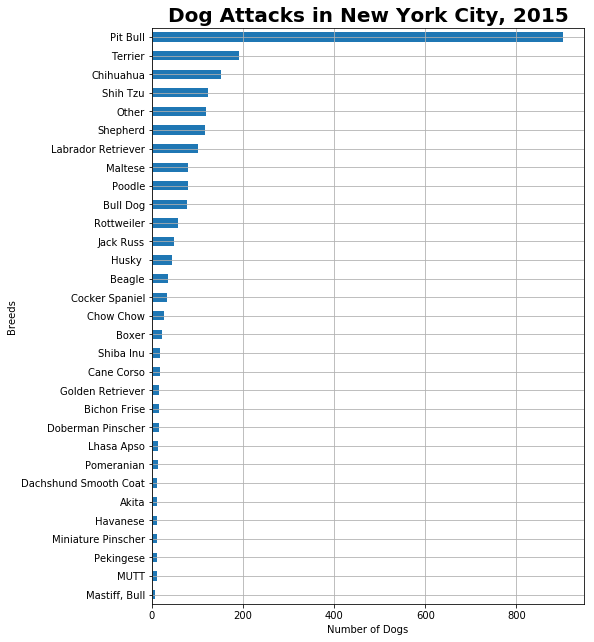

In [22]:
plt.axes([0, 0, 1, 2])
dfdogs2015['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Dog Attacks in New York City, 2015", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()


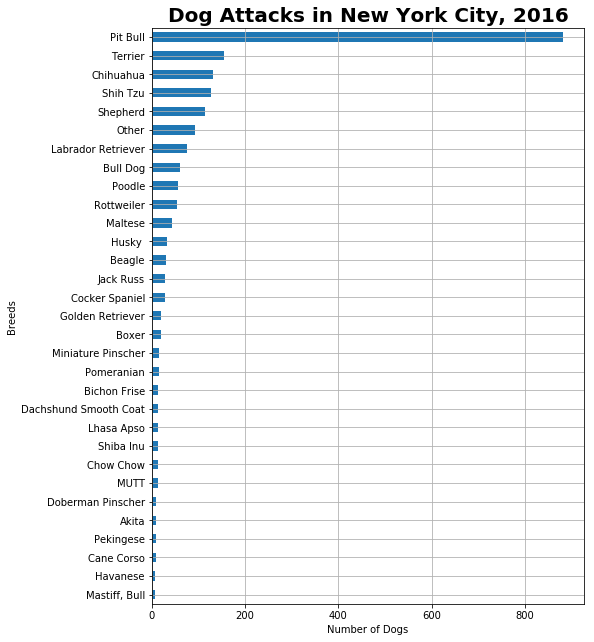

In [23]:
plt.axes([0, 0, 1, 2])
dfdogs2016['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Dog Attacks in New York City, 2016", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()

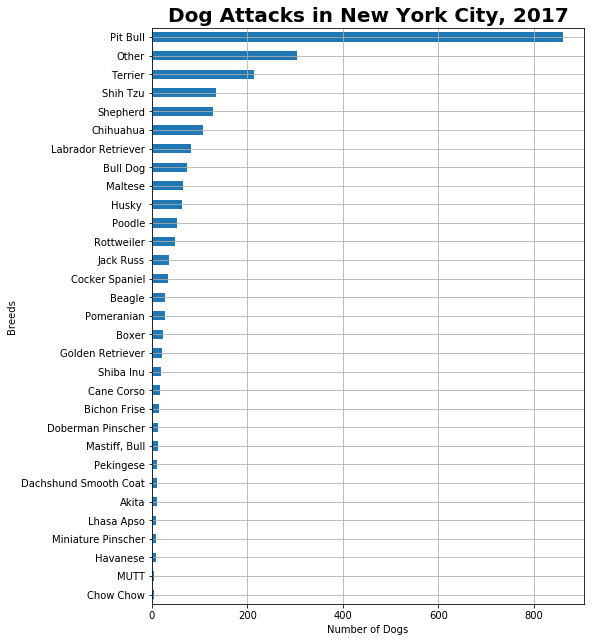

In [24]:
plt.axes([0, 0, 1, 2])
dfdogs2017['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Dog Attacks in New York City, 2017", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()